In [90]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/Lucas/Downloads/realtor_data.csv')

In [91]:
print("Total de duplicatas:", df.duplicated().sum())
print("Dimensão do banco de dados:", df.shape)
df.drop_duplicates(inplace=True)
print("Total de duplicatas após tratamento:", df.duplicated().sum())
print("Dimensão do banco de dados após tratamento de duplicatas:", df.shape)

Total de duplicatas: 1249026
Dimensão do banco de dados: (1401066, 10)
Total de duplicatas após tratamento: 0
Dimensão do banco de dados após tratamento de duplicatas: (152040, 10)


In [92]:
dados_nulos = (df.isnull().mean()*100).round(2)
print("Dados nulos por coluna:")
print(dados_nulos)

Dados nulos por coluna:
status             0.00
bed               16.61
bath              15.48
acre_lot          24.31
city               0.02
state              0.00
zip_code           0.03
house_size        32.54
prev_sold_date    47.76
price              0.01
dtype: float64


In [93]:
colunas_fill = ['bed', 'bath', 'acre_lot', 'house_size']

for col in colunas_fill:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
print("Dimensão de df:", df.shape)
print("Informações do df:", df.info())

Dimensão de df: (152040, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 152040 entries, 0 to 1401063
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          152040 non-null  object 
 1   bed             152040 non-null  float64
 2   bath            152040 non-null  float64
 3   acre_lot        152040 non-null  float64
 4   city            152004 non-null  object 
 5   state           152040 non-null  object 
 6   zip_code        151993 non-null  float64
 7   house_size      152040 non-null  float64
 8   prev_sold_date  79419 non-null   object 
 9   price           152020 non-null  float64
dtypes: float64(6), object(4)
memory usage: 12.8+ MB
Informações do df: None


In [94]:
df = df.dropna(subset=['zip_code','city', 'price'])
df = df.drop(['prev_sold_date', 'status'], axis=1)
df['zip_code'] = df['zip_code'].astype('category')

In [95]:
df.head(5)

,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,1200.0,65000.0


In [96]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

In [97]:
df = df[df['bed'] <= 6]
df = df[df['house_size'] <= 5000]

In [98]:
df2 = pd.read_csv('C:/Users/Lucas/Downloads/Densidade_Pop.csv')
df3 = pd.merge(df, df2, on=['city', 'state'], how="inner").dropna()
df3['densidade'] = pd.to_numeric(df3['densidade'].str.replace(',', '.'), errors='coerce')
df3 = df3.drop(["2016 Population", "Land Area (Square Miles)"], axis=1)
print(df3.shape)

(21770, 9)


In [99]:
df3.head(10)

,bed,bath,acre_lot,city,state,zip_code,house_size,price,densidade
0,3.0,1.0,0.31,Springfield,Massachusetts,1151.0,1252.0,184900.0,4.834
1,4.0,4.0,0.11,Springfield,Massachusetts,1104.0,1908.0,279900.0,4.834
2,3.0,2.0,0.11,Springfield,Massachusetts,1104.0,1200.0,42000.0,4.834
3,3.0,2.0,0.16,Springfield,Massachusetts,1104.0,1284.0,240000.0,4.834
4,2.0,1.0,0.11,Springfield,Massachusetts,1151.0,600.0,79900.0,4.834
5,4.0,2.0,0.11,Springfield,Massachusetts,1109.0,1180.0,239999.0,4.834
6,6.0,2.0,0.13,Springfield,Massachusetts,1108.0,2418.0,249900.0,4.834
7,3.0,2.0,0.15,Springfield,Massachusetts,1118.0,1613.0,299900.0,4.834
8,5.0,3.0,0.14,Springfield,Massachusetts,1108.0,2328.0,289900.0,4.834
9,4.0,4.0,0.21,Springfield,Massachusetts,1129.0,2016.0,350000.0,4.834


In [80]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df3['house_size'] = StandardScaler().fit_transform(df3['house_size'].values.reshape(len(df3), 1))
df3['densidade'] = StandardScaler().fit_transform(df3['densidade'].values.reshape(len(df3), 1))
df3['price'] = StandardScaler().fit_transform(df3['price'].values.reshape(len(df3), 1))
df3['bed'] = MinMaxScaler().fit_transform(df3['bed'].values.reshape(len(df3), 1))
df3['bath'] = MinMaxScaler().fit_transform(df3['bath'].values.reshape(len(df3), 1))
df3['acre_lot'] = MinMaxScaler().fit_transform(df3['acre_lot'].values.reshape(len(df3), 1))

In [15]:
df3.head()

,bed,bath,acre_lot,city,state,zip_code,house_size,price,densidade
0,0.4,0.000000,0.000004,Springfield,Massachusetts,1151.0,-0.323870,-0.759378,-0.186174
1,0.6,0.428571,0.000001,Springfield,Massachusetts,1104.0,0.606439,-0.473879,-0.186174
2,0.4,0.142857,0.000001,Springfield,Massachusetts,1104.0,-0.397614,-1.188829,-0.186174
3,0.4,0.142857,0.000002,Springfield,Massachusetts,1104.0,-0.278489,-0.593789,-0.186174
4,0.2,0.000000,0.000001,Springfield,Massachusetts,1151.0,-1.248506,-1.074930,-0.186174


In [81]:
X = df3[['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'densidade', 'state', 'city']]
y = df3['price']

X = pd.get_dummies(X, columns=[ 'state', 'city'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ModeloLinear = LinearRegression()
ModeloLinear.fit(X_train, y_train)

pred_treino = ModeloLinear.predict(X_train)
pred_teste = ModeloLinear.predict(X_test)
pred_cv = cross_val_predict(ModeloLinear, X_train, y_train, cv=4)


MSE_linear_treino = mean_squared_error(y_train, pred_treino)
MAE_linear_treino = mean_absolute_error(y_train, pred_treino)
R2_linear_treino = r2_score(y_train, pred_treino)
MSE_linear_teste = mean_squared_error(y_test, pred_teste)
MAE_linear_teste = mean_absolute_error(y_test, pred_teste)
R2_linear_teste = r2_score(y_test, pred_teste)
MSE_linear_kf = -cross_val_score(ModeloLinear, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
MAE_linear_kf = -cross_val_score(ModeloLinear, X_train, y_train, cv=4, scoring='neg_mean_absolute_error')
R2_linear_kf = cross_val_score(ModeloLinear, X_train, y_train, cv=4, scoring='r2')


In [83]:
print("Treino")
print("R^2:", R2_linear_treino)
print("MSE:", MSE_linear_treino)
print("MAE:", MAE_linear_treino)
print("Teste")
print("R²:", R2_linear_teste)
print("MSE:", MSE_linear_teste)
print("MAE:", MAE_linear_teste)
print("Treino - Validação Cruzada")
print("MSE:", MSE_linear_kf)
print("MAE:", MAE_linear_kf)
print("R^2:", R2_linear_kf)

Treino
R^2: 0.6235321377696148
MSE: 0.3735468607418393
MAE: 0.43140324797018237
Teste
R²: 0.6339696770432641
MSE: 0.3773221074740509
MAE: 0.4355189540798265
Treino - Validação Cruzada
MSE: [0.3965446  0.37105541 0.37717051 0.3604541 ]
MAE: [0.44273048 0.42944551 0.43970815 0.42206319]
R^2: [0.60635264 0.62661878 0.62694479 0.62293164]


In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Criar e treinar o modelo
Model_DecisionTree = DecisionTreeRegressor(max_depth=8)
Model_DecisionTree.fit(X_train, y_train)

pred_treino = Model_DecisionTree.predict(X_train)
pred_teste = Model_DecisionTree.predict(X_test)


MSE_DT_treino = mean_squared_error(y_train, pred_treino)
MAE_DT_treino = mean_absolute_error(y_train, pred_treino)
R2_DT_treino = r2_score(y_train, pred_treino)
MSE_DT_teste = mean_squared_error(y_test, pred_teste)
MAE_DT_teste = mean_absolute_error(y_test, pred_teste)
R2_DT_teste = r2_score(y_test, pred_teste)

In [85]:
print("Treinamento")
print("R²:", R2_DT_treino)
print("MSE:", MSE_DT_treino)
print("MAE:", MAE_DT_treino)
print("Teste")
print("R²:", R2_DT_teste)
print("MSE:", MSE_DT_teste)
print("MAE:", MAE_DT_teste)

Treinamento
R²: 0.7136571701176491
MSE: 0.2841211054903523
MAE: 0.3635801441948917
Teste
R²: 0.6760483073373325
MSE: 0.3339453802840036
MAE: 0.3928999298844063


In [17]:
from sklearn.tree import DecisionTreeRegressor

Model_DecisionTree = DecisionTreeRegressor(max_depth=12)

Model_DecisionTree.fit(X_train, y_train)


y_pred = Model_DecisionTree.predict(X_test)

MSE_DT = mean_squared_error(y_test, y_pred)
MAE_DT = mean_absolute_error(y_test, y_pred)
R2_DT = r2_score(y_test, y_pred)


In [18]:
print("Modelo Decision Tree")
print("R Quadrado: ", R2_DT)
print("Erro Médio Absoluto: ", MAE_DT)
print("Erro Médio Quadrático: ", MSE_DT)

Modelo Decision Tree
R Quadrado:  0.7061691181995451
Erro Médio Absoluto:  0.35446145100440674
Erro Médio Quadrático:  0.30289536305715015


In [86]:
from sklearn.ensemble import RandomForestRegressor

Modelo_RandomForest = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=42)
Modelo_RandomForest.fit(X_train, y_train)

pred_treino = Modelo_RandomForest.predict(X_train)
pred_teste = Modelo_RandomForest.predict(X_test)

#Treino
MSE_RF_treino = mean_squared_error(y_train, pred_treino)
MAE_RF_treino = mean_absolute_error(y_train, pred_treino)
R2_RF_treino = r2_score(y_train, pred_treino)

# Teste
MSE_RF_teste = mean_squared_error(y_test, pred_teste)
MAE_RF_teste = mean_absolute_error(y_test, pred_teste)
R2_RF_teste = r2_score(y_test, pred_teste)

In [87]:
print("Treino")
print("MSE:", MSE_RF_treino)
print("MAE:", MAE_RF_treino)
print("R^2:", R2_RF_treino)

print("Teste")
print("MSE:", MSE_RF_teste)
print("MAE:", MAE_RF_teste)
print("R^2:", R2_RF_teste)

Treino
MSE: 0.190615697824457
MAE: 0.277604040471793
R^2: 0.8078937562879943
Teste
MSE: 0.24134827509245851
MAE: 0.31702168911921597
R^2: 0.7658743409747889


In [88]:
from sklearn.neighbors import KNeighborsRegressor

ModeloKNN = KNeighborsRegressor(n_neighbors=15)
ModeloKNN.fit(X_train, y_train)

pred_treino = ModeloKNN.predict(X_train)
pred_teste = ModeloKNN.predict(X_test)

MSE_knn_treino = mean_squared_error(y_train, pred_treino)
MAE_knn_treino = mean_absolute_error(y_train, pred_treino)
R2_knn_treino = r2_score(y_train, pred_treino)
MSE_knn_teste = mean_squared_error(y_test, pred_teste)
MAE_knn_teste = mean_absolute_error(y_test, pred_teste)
R2_knn_teste = r2_score(y_test, pred_teste)

In [89]:

print("Treino")
print("R Quadrado: ", R2_knn_treino)
print("Erro Médio Absoluto: ", MAE_knn_treino)
print("Erro Médio Quadrático: ", MSE_knn_treino)
print("Teste")
print("R Quadrado: ", R2_knn_teste)
print("Erro Médio Absoluto: ", MAE_knn_teste)
print("Erro Médio Quadrático: ", MSE_knn_teste)

Treino
R Quadrado:  0.767348172354249
Erro Médio Absoluto:  0.31062242750871955
Erro Médio Quadrático:  0.2308466899353498
Teste
R Quadrado:  0.7370486484925354
Erro Médio Absoluto:  0.33805624472994095
Erro Médio Quadrático:  0.27106322042524833


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns



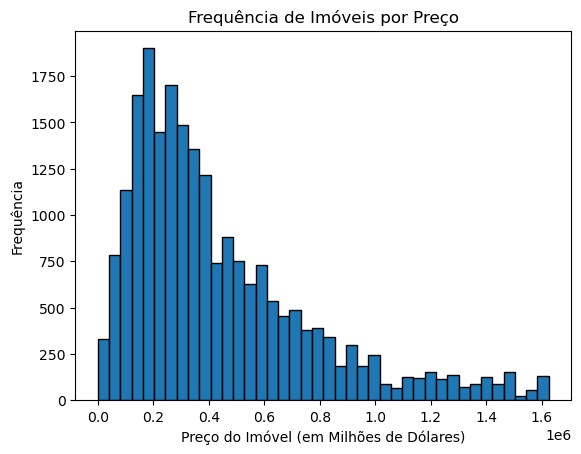

In [101]:
plt.hist(df3['price'], edgecolor='black',bins=40)
plt.title('Frequência de Imóveis por Preço')
plt.xlabel("Preço do Imóvel (em Milhões de Dólares)")
plt.ylabel('Frequência')
plt.show()

Text(0, 0.5, 'Frequência')

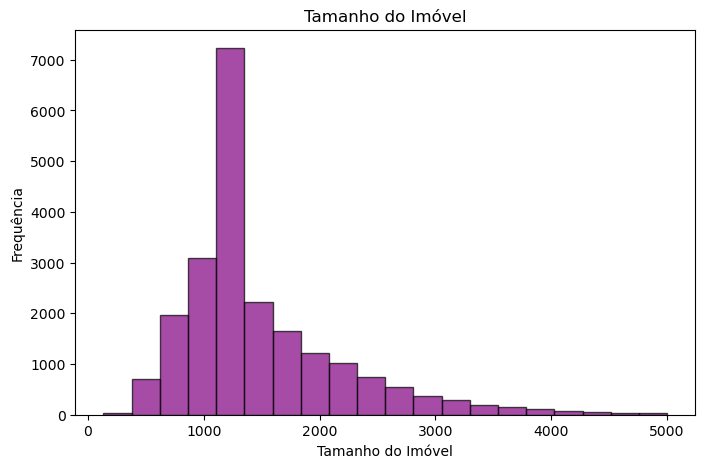

In [102]:
plt.figure(figsize=(8, 5))
plt.hist(df3['house_size'], color='purple', edgecolor='black',bins=20, alpha=0.7)

plt.title('Tamanho do Imóvel')
plt.xlabel('Tamanho do Imóvel')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

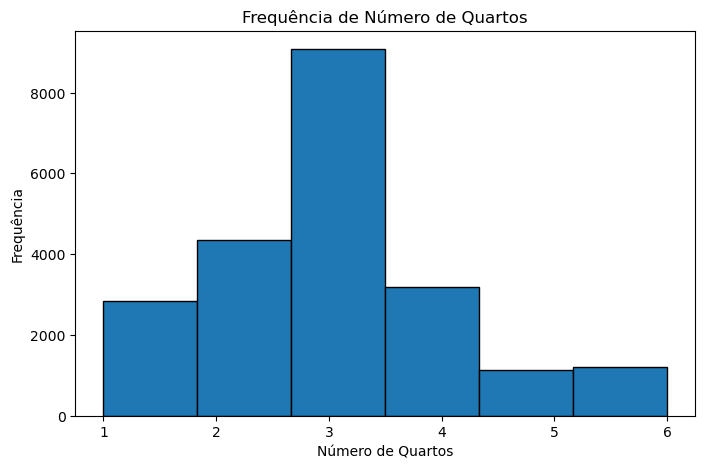

In [103]:

plt.figure(figsize=(8, 5))
plt.hist(df3['bed'], edgecolor='black',bins=6)

plt.title('Frequência de Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

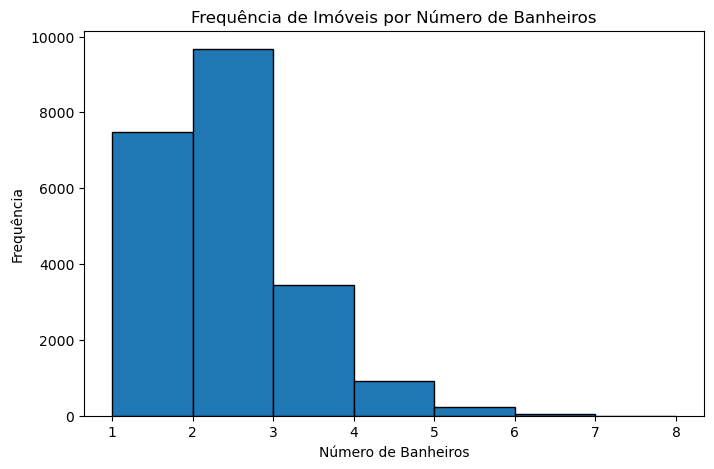

In [104]:
plt.figure(figsize=(8, 5))
plt.hist(df3['bath'], edgecolor='black',bins=7)

plt.title('Frequência de Imóveis por Número de Banheiros')
plt.xlabel('Número de Banheiros')
plt.ylabel('Frequência')

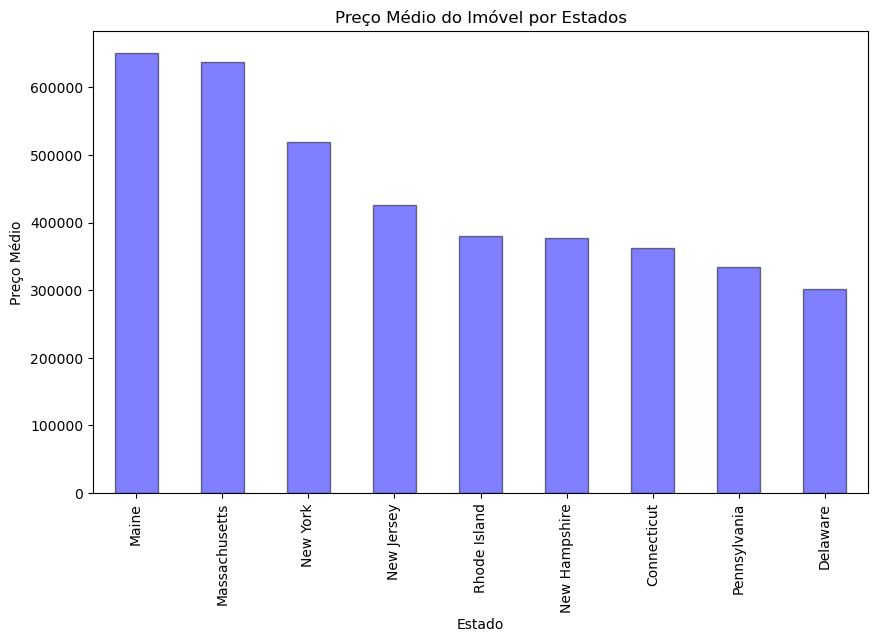

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

preço_médio_estado = df3.groupby('state')['price'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
preço_médio_estado.plot(kind='bar', edgecolor='black', color='blue', alpha=0.5)
plt.title('Preço Médio do Imóvel por Estados')
plt.xlabel('Estado')
plt.ylabel('Preço Médio')
plt.show()


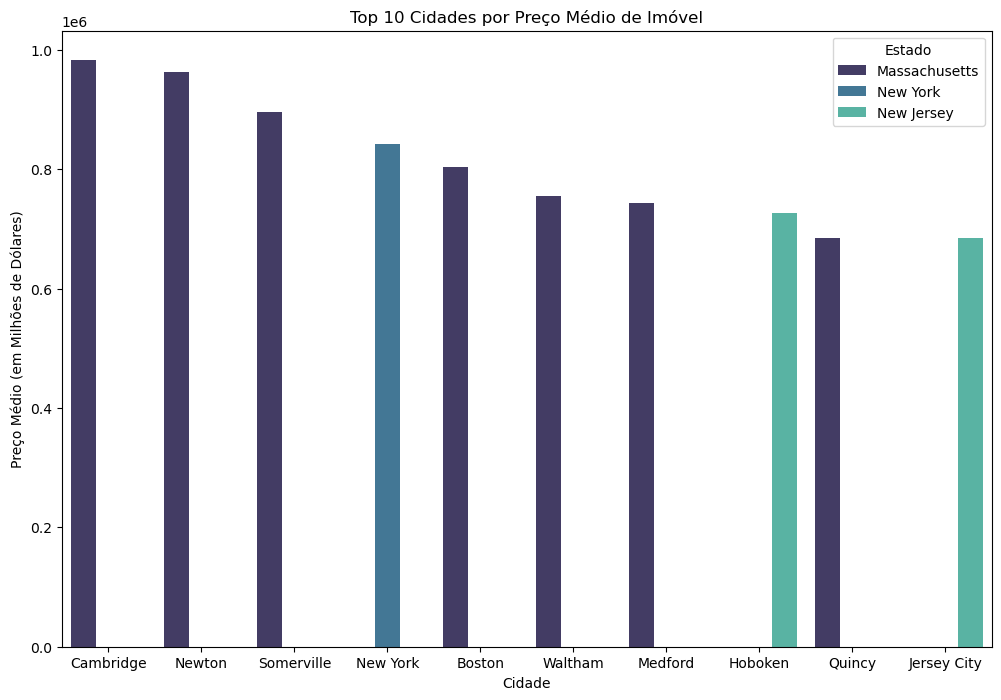

In [105]:
mean_price_by_city = df3.groupby(['state', 'city'])['price'].mean().reset_index()

mean_price_by_city = mean_price_by_city.sort_values(by='price', ascending=False)

top_10_cities = mean_price_by_city.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='city', y='price', hue='state', data=top_10_cities, palette='mako')
plt.xlabel('Cidade')
plt.ylabel("Preço Médio (em Milhões de Dólares)")
plt.title('Top 10 Cidades por Preço Médio de Imóvel')
plt.legend(title='Estado')
plt.show()
